In [20]:
from descriptive import DataSet 
import pandas as pd

## Descriptive statistics on the pre-election dataset (training + test)

In [21]:
pre = DataSet('pre_election')
macron = DataSet('prediction_macron')
lepen = DataSet('prediction_lepen')
labels = pre.get_labels()
words = pre.get_words()
emojis = pre.get_emojis()
sources = pre.get_sources()
char_count = pre.get_character_count()
hashtags = pre.get_tags('hashtags')
mentions = pre.get_tags('mentions')
verifications = pre.get_verifications()
time_differences = pre.calculate_time_difference()

### Sentiment Labels

8591
neu    5225
pos    1755
neg    1611
Name: Sentiment, dtype: int64


<AxesSubplot:ylabel='Sentiment'>

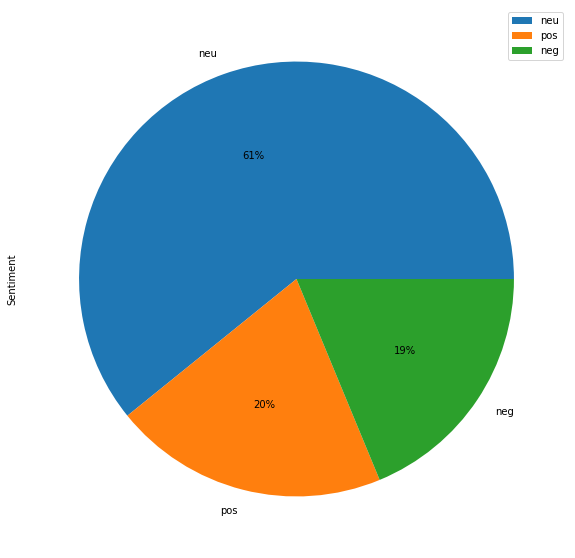

In [38]:
print(len(labels['Sentiment']))
ff = labels['Sentiment'].value_counts()
print(ff)
ff.plot(y='Sentiment', kind='pie', legend=True, figsize=(15,10), autopct='%1.0f%%')

### Words

In [23]:
print(len(words['Word']))
print(len(macron.get_words()['Word']))
print(len(lepen.get_words()['Word']))

160689
28913
28475


In [24]:
words_pre = words.groupby(['Word']).count().sort_values('Tweet ID').sort_values(['Tweet ID'], ascending=False).head(10)
words_macron = macron.get_words().groupby(['Word']).count().sort_values('Tweet ID').sort_values(['Tweet ID'], ascending=False).head(10)
words_lepen = lepen.get_words().groupby(['Word']).count().sort_values('Tweet ID').sort_values(['Tweet ID'], ascending=False).head(11)
display(words_pre)
display(words_macron)
display(words_lepen)

,Tweet ID
Word,
de,7094
la,3652
pour,3596
le,3469
et,3196
à,2967
les,2908
voter,2768
pas,2522


,Tweet ID
Word,
de,1337
Macron,809
la,759
le,605
à,601
et,587
les,499
pour,491
que,381


,Tweet ID
Word,
de,1355
Le,1212
Pen,971
le,761
Marine,760
la,684
à,552
et,511
pour,397


### Emojis

In [39]:
se = pd.merge(labels, emojis, how='inner').groupby(['Sentiment', 'Emoji']).count().sort_values(
    ['Sentiment', 'Tweet ID'], ascending=[False, False]
).query('`Tweet ID` > 20')
se['Percentage'] = ((se['Tweet ID'] / se.groupby('Sentiment')['Tweet ID'].transform('sum')) * 100).round(2)
se

Tweet ID  Percentage
Sentiment Emoji                      
pos       🇫🇷          309       33.48
          🗳           111       12.03
          ❤            70        7.58
          ✊            67        7.26
          💪            50        5.42
          👉            43        4.66
          👍            37        4.01
          🙏            36        3.90
          ✅            32        3.47
          🏻            32        3.47
          ➡            30        3.25
          🐢            30        3.25
          👏            26        2.82
          🔴            26        2.82
          🚀            24        2.60
neu       😂           150       16.63
          😭           102       11.31
          🗳            98       10.86
          🤣            88        9.76
          🇫🇷           84        9.31
          🤔            64        7.10
          👉            61        6.76
          ➡            50        5.54
          ⬇            38        4.21
          👇            37        4.10
          😅            30        3.33
          😉            30        3.33
          💀            27        2.99
          🔴            22        2.44
          😁            21        2.33
neg       😡            54       28.72
          😂            41       21.81
          💀            37       19.68
          🤣            31       16.49
          🤮            25       13.30

In [26]:
macron_emojis = macron.get_emojis().groupby(['Emoji']).count().sort_values('Tweet ID').sort_values(['Tweet ID'], ascending=False).head(5)
lepen_emojis = lepen.get_emojis().groupby(['Emoji']).count().sort_values('Tweet ID').sort_values(['Tweet ID'], ascending=False).head(5)
display(macron_emojis)
display(lepen_emojis)

,Tweet ID
Emoji,
🇫🇷,59
😂,38
🤣,36
🤡,29
👇,29


,Tweet ID
Emoji,
🇫🇷,38
😂,26
🙏,20
⬇,20
🤣,19


### Sources

In [27]:
len(sources.groupby(['Source']).count())

95

In [28]:
s = sources.groupby(['Source']).count().sort_values('Tweet ID').sort_values(['Tweet ID'], ascending=False).head(5)
s['Percentage'] = ((s['Tweet ID'] / sources['Tweet ID'].count()) * 100).round(2)

macron_sources = macron.get_sources()
macron_s = macron_sources.groupby(['Source']).count().sort_values('Tweet ID').sort_values(['Tweet ID'], ascending=False).head(5)
macron_s['Percentage'] = ((macron_s['Tweet ID'] / macron_sources['Tweet ID'].count()) * 100).round(2)

lepen_sources = lepen.get_sources()
lepen_s = lepen_sources.groupby(['Source']).count().sort_values('Tweet ID').sort_values(['Tweet ID'], ascending=False).head(5)
lepen_s['Percentage'] = ((lepen_s['Tweet ID'] / lepen_sources['Tweet ID'].count()) * 100).round(2)

display(s)
display(macron_s)
display(lepen_s)

,Tweet ID,Percentage
Source,,
Twitter for iPhone,3140,36.55
Twitter for Android,2556,29.75
Twitter Web App,1761,20.50
Twitter for iPad,127,1.48
TweetDeck,69,0.80


,Tweet ID,Percentage
Source,,
Twitter for Android,500,32.59
Twitter Web App,436,28.42
Twitter for iPhone,431,28.10
Twitter for iPad,41,2.67
WordPress.com,7,0.46


,Tweet ID,Percentage
Source,,
Twitter for Android,463,30.18
Twitter Web App,450,29.34
Twitter for iPhone,444,28.94
Twitter for iPad,34,2.22
WordPress.com,25,1.63


### Tags

In [29]:
print(hashtags.groupby('Tweet ID').count().apply(lambda x: x >= 1).value_counts())
print(mentions.groupby('Tweet ID').count().apply(lambda x: x >= 1).value_counts())
hm = pd.merge(hashtags, mentions, how='inner').query('Hashtags != Hashtags and Mentions != Mentions')
len(hm)

Hashtags
False       5674
True        2917
dtype: int64
Mentions
False       7240
True        1351
dtype: int64


5059

In [30]:
m_hashtags = macron.get_tags('hashtags')
m_mentions = macron.get_tags('mentions')
print(m_hashtags.groupby('Tweet ID').count().apply(lambda x: x >= 1).value_counts())
print(m_mentions.groupby('Tweet ID').count().apply(lambda x: x >= 1).value_counts())
mt = pd.merge(m_hashtags, m_mentions, how='inner').query('Hashtags != Hashtags and Mentions != Mentions')
len(mt)

Hashtags
False       992
True        542
dtype: int64
Mentions
False       1323
True         211
dtype: int64


856

In [31]:
l_hashtags = lepen.get_tags('hashtags')
l_mentions = lepen.get_tags('mentions')
print(l_hashtags.groupby('Tweet ID').count().apply(lambda x: x >= 1).value_counts())
print(l_mentions.groupby('Tweet ID').count().apply(lambda x: x >= 1).value_counts())
lt = pd.merge(l_hashtags, l_mentions, how='inner').query('Hashtags != Hashtags and Mentions != Mentions')
len(lt)

Hashtags
False       1144
True         390
dtype: int64
Mentions
False       1229
True         305
dtype: int64


915

In [32]:
pre_tags = hashtags.groupby(['Hashtags']).count().sort_values('Tweet ID').sort_values(['Tweet ID'], ascending=False).head(5)
macron_tags = macron.get_tags('hashtags').groupby(['Hashtags']).count().sort_values('Tweet ID').sort_values(['Tweet ID'], ascending=False).head(5)
lepen_tags = lepen.get_tags('hashtags').groupby(['Hashtags']).count().sort_values('Tweet ID').sort_values(['Tweet ID'], ascending=False).head(5)

display(pre_tags)
display(macron_tags)
display(lepen_tags)

,Tweet ID
Hashtags,
presidentielles2022,398
DimancheJeVoteMelenchon,296
Macron,237
Presidentielle2022,184
Melenchon,153


,Tweet ID
Hashtags,
Macron,200
presidentielles2022,75
Presidentielles,51
macron,45
TousContreMacron,41


,Tweet ID
Hashtags,
presidentielles2022,29
TPMP,28
Presidentielles,26
JeVoteMacron,24
Presidentielle2022,23


### User Verification

In [33]:
dd = verifications.groupby(['User Verified']).count().sort_values('Tweet ID').sort_values(['Tweet ID'], ascending=False).head(5)
macron_verif = macron.get_verifications().groupby(['User Verified']).count().sort_values('Tweet ID').sort_values(['Tweet ID'], ascending=False).head(5)
lepen_verif = lepen.get_verifications().groupby(['User Verified']).count().sort_values('Tweet ID').sort_values(['Tweet ID'], ascending=False).head(5)

display(dd)
display(macron_verif)
display(lepen_verif)

,Tweet ID
User Verified,
False,7674
True,276


,Tweet ID
User Verified,
False,1451
True,20


,Tweet ID
User Verified,
False,1449
True,50


### Time difference between Tweet and Account creation

In [34]:
st = pd.merge(labels, time_differences, how='inner')
print("Pre-election: " + str(time_differences['Time Difference'].median()))
print(st.groupby(['Sentiment']).median())
print("\nMacron: " + str(macron.calculate_time_difference()['Time Difference'].median()))
print("\nLe Pen: " + str(lepen.calculate_time_difference()['Time Difference'].median()))

Pre-election: 1961.5
           Time Difference
Sentiment                 
neg                 1701.0
neu                 2067.0
pos                 1984.0

Macron: 1373.0

Le Pen: 1916.0


Sentiment
neg    AxesSubplot(0.125,0.125;0.775x0.755)
neu    AxesSubplot(0.125,0.125;0.775x0.755)
pos    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Time Difference, dtype: object

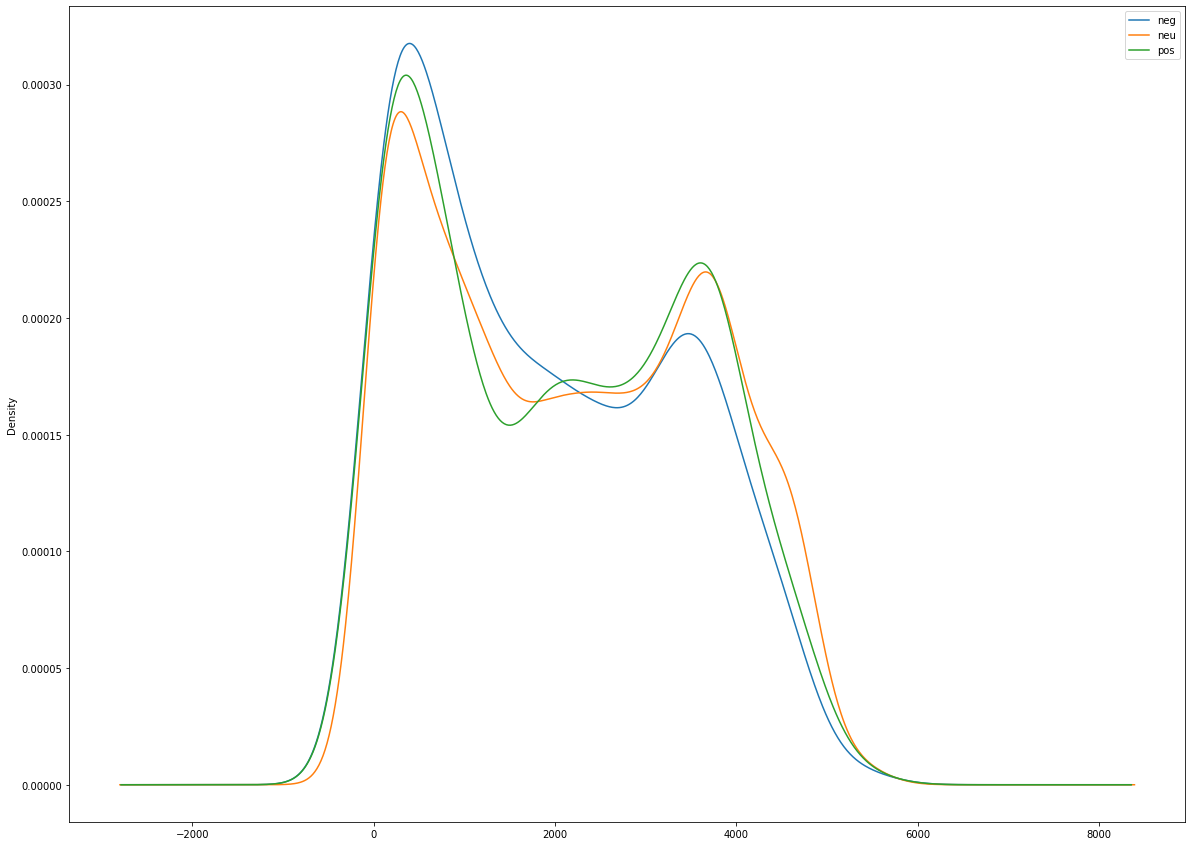

In [35]:
display(st.groupby('Sentiment')['Time Difference'].plot(kind='density', legend=True, figsize=(20,15)))

### Character count

In [36]:
sc = pd.merge(labels, char_count, how='inner')
print("Pre-election: " + str(char_count['Character Count'].median()))
print(sc.groupby(['Sentiment']).median())
print("\nMacron: " + str(macron.get_character_count()['Character Count'].median()))
print("\nLe Pen: " + str(lepen.get_character_count()['Character Count'].median()))

Pre-election: 136.0
           Character Count
Sentiment                 
neg                  126.0
neu                  134.0
pos                  157.0

Macron: 137.0

Le Pen: 116.0


Sentiment
neg    AxesSubplot(0.125,0.125;0.775x0.755)
neu    AxesSubplot(0.125,0.125;0.775x0.755)
pos    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Character Count, dtype: object

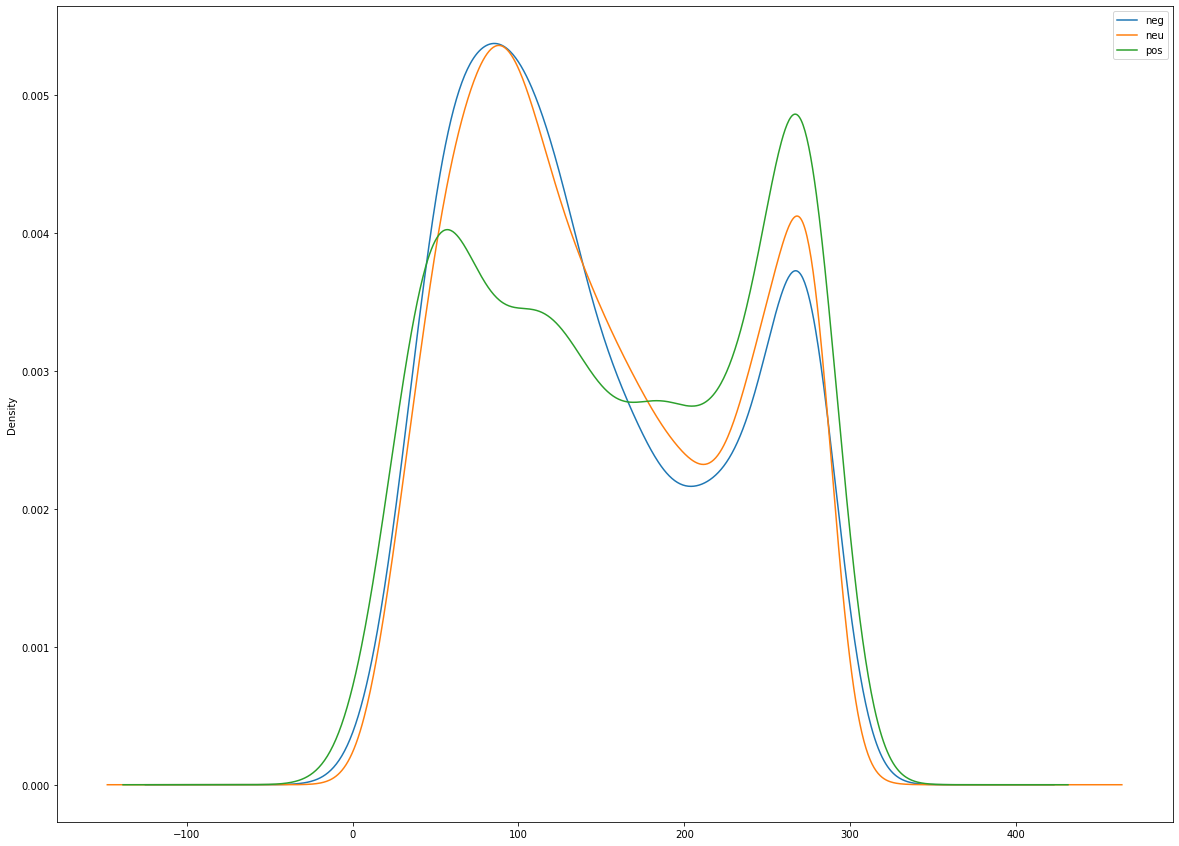

In [37]:
sc.groupby('Sentiment')['Character Count'].plot(kind='density', legend=True, figsize=(20,15))